# Анализ оттока клиентов банка «Метанпромбанк»

**Описание проекта.** Исследование выполнено для регионального банка «Метанпромбанк», столкнувшегося с высоким показателем оттока клиентов. Удержание клиентов является одним из самых важных показателей для бизнеса. Удержание текущих клиентов дает более стабильные преимущества для бизнеса в долгосрочной перспективе и является менее затратным, чем привлечение новых клиентов. Для банков удержание клиентов особенно важно, поскольку банковскими продуктами (дебетовыми, кредитными картами и пр.) клиенты пользуются ежедневно, выбирая обслуживающий банк на долгий срок. В проекте на основании предоставленных данных исследуются признаки отточности, позволяющие составить сегменты клиентов, склонных уходить из банка. На основании таких сегментов возможно составить наиболее эффективные рекомендации по удержанию клиентов в банке.

**Цель исследования:** определить основные факторы, влияющие на отток клиентов, и на их основании выделить сегменты клиентов, более склонных к уходу из банка. Дать рекомендации по удержанию клиентов выделенных сегментов.

**Ход исследования:** 

**1. Загрузка и предобработка данных**
- первичное описание данных;
- выявление и обработка пропущенных значений;
- выявление и обработка явных и неявных дубликатов;
- преобразование типов данных;
- оценка аномалий и выбросов.

**2. Исследовательский анализ данных** 

- анализ распределения признаков;
- выделение отточных интервалов непрерывных признаков;
- выделение отточных значений дискретных/категориальных признаков;
- анализ портретов клиентов в разрезе отточности;
- корреляционный анализ.

**3. Проверка статистических гипотез**:

- проверка гипотезы о равенстве доходов между отточными и неотточными клиентами;
- проверка гипотезы о равенстве возрастов отточных и неотточных клиентов;
- проверка гипотезы о равенстве балансов отточных и неотточных клиентов.

**4. Определение критериев отточности**

- промежуточные выводы по результатам исследовательского анализа и проверки гипотез;
- ранжирование критериев по уровню влияния на отток.

**5. Сегментация клиентов и составление рекомендаций**

- выделение трех отточных сегментов на основании выделенных критериев;
- составление рекомендаций по удержанию клиентов в каждом сегменте;
- приоритизация сегментов.

**Общий вывод:** в ходе анализа были определены признаки, больше других оказывающие влияние на отток клиентов. Клиенты с более высокими баллами собственности, с бОльшим балансом на счёте, клиенты мужского пола и те клиенты, у которых не оформлена кредитная карта, более склонны уходить из банка. Меньшее влияние на уход из банка оказывают количество используемых продуктов, кредитный скоринг, оценочный доход и возраст клиентов. Выделены три высокооточных сегмента клиентов: состоятельные клиенты; мужчины, владеющие собственностью; молодые надёжные заёмщики.

Рекомендации, составленные по каждому из трёх сегментов, помогут банку снизить уровень отточности.

**Описание данных**

Датасет `bank_scrooge.csv` содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Столбцы:**
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

## Загрузка и предобработка данных

### Импорт библиотек и загрузка данных

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np 
from scipy import stats as st
from scipy.stats import mode
import matplotlib.pyplot as plt 
import seaborn as sns 
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# устаналиваем phik
! pip install phik --quiet
from phik import resources, report
from phik import phik_matrix

In [3]:
# загрузим датасет 
data = pd.read_csv('C:/Users/alkon/practicum_projects/bank_project/bank_scrooge.csv')
# для удобства установим формат отображения чисел
pd.options.display.float_format = '{:.2f}'.format

### Первичное описание данных

In [4]:
# напишем универсальную функцию, которая выведет основную информацию для знакомства с датафреймом
def general (data):
    
    # выведем информацию о датафрейме
    print('\033[1mИнформация о датафрейме:\033[0m')
    display(data.info())
    
    # выведем первые строки датафрейма
    print('\033[1mПервые строки датафрейма:\033[0m')
    display(data.head())
    
    # выведем числовое описание данных 
    print('\033[1mЧисловое описание данных:\033[0m')
    display(data.describe().round(2))
    
    # найдём долю пропусков
    na_percent = data.isna().mean() * 100
    print('\033[1mДоля пропущенных значений:\033[0m')
    display(na_percent.round(2).astype(str) + '%')
    
    # выявим количество явных дубликатов
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('\033[1mКоличество явных дубликатов:\033[0m', duplicates)
    else:
        print('\033[1mЯвные дубликаты не обнаружены.\033[0m')

In [5]:
# применим написанную ранее функцию к датафрейму
general(data)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

Первые строки датафрейма:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


Числовое описание данных:


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Доля пропущенных значений:


USERID             0.0%
score              0.0%
city               0.0%
gender             0.0%
age               0.26%
equity             0.0%
balance          22.95%
products           0.0%
credit_card        0.0%
last_activity      0.0%
EST_SALARY         0.0%
churn              0.0%
dtype: object

Явные дубликаты не обнаружены.


In [6]:
# проверим данные о категориальных переменных
print('\033[1mПредставленные города:\033[0m\n', data['city'].value_counts())
print('\033[1mПол клиентов:\033[0m\n', data['gender'].value_counts())

Представленные города:
 city
Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: count, dtype: int64
Пол клиентов:
 gender
М    5005
Ж    4995
Name: count, dtype: int64


Датафрейм содержит **10 тыс. записей** и **12 столбцов** с типами данных *int*, *float*, *object*. Столбцы `score`, `age`, `balance` (в случае полной обработки пропусков), `EST_SALARY` можно привести к целочисленному типу, а столбцы `credit_card`, `churn` и `last_activity` к булеву. Названия столбцов для удобства анализа необходимо привести к единому регистру.

В двух столбцах есть **пропущенные значения**: в столбце `age` доля пропусков менее 1% (можно удалить или оставить как есть), в столбце `balance` доля пропусков составляет практически четверть строк (необходимо подробнее изучить пропущенные значения в этом столбце, чтобы выбрать способ обработки). 

**Явные дубликаты** не обнаружены, необходимо произвести проверку на неявные дубликаты по столбцу с идентификатором пользователя.

**Числовое описание данных** выглядит нормально. Кредитный скоринг клиентов находится в диапазоне 642-1000 баллов, возраст клиентов 18-86 лет, в собственности клиентов находится 0-9 единиц, максимальное количество продуктов на одного клиента равно 5 (0 продуктов скорее всего у ушедших клиентов). В этих столбцах среднее приблизительно равно медиане, выбросов нет, данные распределены нормально. Для удобства анализа столбцы с доходом и балансом пользователей необходимо масштабировать. Оценочный доход клиентов находится в диапазоне от 2.5 тыс. рублей (приблизительный размер стипендий) до 1.4 млн рублей (клиенты с высоким доходом, также выглядит правдоподобно). Баланс клиентов находится в диапазоне от 0 до 119 млн рублей. Среднее превышает медиану, есть скошенность в правую сторону в пользу клиентов с доходом и балансом выше среднего. 

Оценим **строковые данные**: в датасете представлены три города — Ярославль (самая многочисленная категория), Рыбинск и Ростов; клиенты мужского и женского пола распределены в приблизительно в равных долях.

### Предобработка данных

Сначала приведем названия столбцов к единому стилю. Типы данных преобразуем после обработки пропусков. 

In [7]:
# приведём названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# приведем название столбца с идентификатором пользователя к змеиному регистру
data.rename(columns={'userid': 'user_id'}, inplace=True)
# проверим результат
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Перейдём к **обработке пропусков**. Выше мы уже выяснили, что доля пропущенных значений в столбце `age` составляет менее 1% данных, следовательно эти строки можно удалить. Скорее всего значения пропущены по причине технической ошибки, поскольку для оформления продуктов в банке необходимо предъявлять паспортные данные, в том числе информацию о дате рождения.

In [8]:
# удаляем строки, в которых пропущено значение age
data = data.dropna(subset = ['age']) 
# проверяем результат
print('Количество пропусков в столбце `age` после обработки:', data['age'].isna().sum())

Количество пропусков в столбце `age` после обработки: 0


В столбце `balance` доля пропущенных значений достигает 23%, что составляет практически четверть всех строк. Необходимо определить природу пропусков, чтобы выбрать способ обработки. В первую очередь посмотрим, присутствуют ли в данных клиенты с нулевым балансом.

In [9]:
data.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.00,Ярославль,М,18.00,0,0.00,2,1,1,64548.33,0
6757,148456,813.00,Ярославль,М,20.00,2,0.00,2,1,0,23876.51,0


Таких клиентов всего двое из 10 тысяч, что выглядит неправдоподобно. Можем предположить, что пропущенные значения означают нулевой баланс на счете клиента. Однако для более детального анализа посмотрим, зависит ли наличие пропуска в балансе от других переменных.

In [10]:
# создадим новый признак, который будет равен 1, если "balance" пропущен, и 0, если не пропущен
data['balance_is_missing'] = data['balance'].isnull().astype(int)

# сгруппируем данные по наличию пропусков в столбце с балансом и посчитаем центральные тенденции
balance_is_null_stats = data.groupby('balance_is_missing').agg({'score': 'mean',
                                    'age' : 'mean',
                                    'equity' : 'median',
                                    'products' : 'median',
                                    'credit_card' : 'mean',
                                    'last_activity' : 'mean',
                                    'est_salary' : 'mean',
                                    'churn' : 'mean'}).reset_index(drop=True)

# выведем в процентах столбцы с булевыми значениями
variables = ['credit_card', 'last_activity', 'churn']
for v in variables:
    balance_is_null_stats[v] = balance_is_null_stats[v].map('{:.2%}'.format)
display(balance_is_null_stats.round(2))

,score,age,equity,products,credit_card,last_activity,est_salary,churn
0,843.74,42.92,4.00,2.00,64.02%,51.51%,124520.39,23.47%
1,865.36,42.09,0.00,1.00,81.53%,54.89%,226345.42,0.57%


Менее 1% клиентов с пропущенным балансом являются отточными, в то время как среди тех, у кого баланс заполнен, доля отточных клиентов составляет 23%: следовательно, пропуски возникли не по причине ухода клиентов из банка. Видим, что клиенты с пропущенным балансом в среднем не владеют собственностью, пользуются одним продуктом банка и 82% из них пользуются кредитной картой. Средний уровень заработка таких клиентов также выше.

In [11]:
# выведем количество клиентов, у которых пропущен баланс, 1 используемый продукт и это кредитная карта
credit_users = data[(data['balance_is_missing'] == 1) & (data['products'] == 1) & (data['credit_card'] == 1)]
credit_users_percent = (len(credit_users) / data['balance'].isna().sum()) * 100

print('Количество клиентов с пропуском в балансе, которые пользуются кредитной картой:', len(credit_users))
print('Доля этих клиентов от всех клиентов с пропусками в балансе:', credit_users_percent.round(2), '%')

Количество клиентов с пропуском в балансе, которые пользуются кредитной картой: 1585
Доля этих клиентов от всех клиентов с пропусками в балансе: 69.55 %


70% клиентов, у которых пропущено значение баланса, пользуются одним продуктом банка и это кредитная карта. Можем предположить, что баланс этих клиентов 0.

In [12]:
equity_null = data[(data['balance_is_missing'] == 1) & (data['equity'] == 0)]
equity_null_percent = (len(equity_null) / data['balance'].isna().sum()) * 100

print('Количество клиентов с пропуском в балансе, у которых нет собственности:', len(equity_null))
print('Доля этих клиентов от всех клиентов с пропусками в балансе:', equity_null_percent.round(2), '%')

Количество клиентов с пропуском в балансе, у которых нет собственности: 2164
Доля этих клиентов от всех клиентов с пропусками в балансе: 94.95 %


Видим, что 95% клиентов с пропущенным значением баланса не владеют собственностью.

In [13]:
# выведем процент мужчин и женщин в разрезе пропущенного баланса
gender_null = data.groupby('balance_is_missing')['gender'].value_counts(normalize=True) * 100
print('\033[1mРаспределение мужчин и женщин в разрезе пропущенного баланса\033[0m\n')
display(gender_null.round(2).astype(str) + '%')

# выведем процент клиентов из разных городов в разрезе пропущенного баланса
city_null = data.groupby('balance_is_missing')['city'].value_counts(normalize=True) * 100
print('\033[1mРаспределение городов в разрезе пропущенного баланса\033[0m\n')
display(city_null.round(2).astype(str) + '%')

Распределение мужчин и женщин в разрезе пропущенного баланса



balance_is_missing  gender
0                   Ж         51.67%
                    М         48.33%
1                   М         55.81%
                    Ж         44.19%
Name: proportion, dtype: object

Распределение городов в разрезе пропущенного баланса



balance_is_missing  city     
0                   Ярославль     57.4%
                    Рыбинск      27.25%
                    Ростов       15.35%
1                   Ярославль    63.98%
                    Рыбинск      25.71%
                    Ростов       10.31%
Name: proportion, dtype: object

Видим, что по признакам `age` и `city` данные распределены аналогично у двух групп клиентов. Среди тех, у кого пропущен баланс, чуть больше мужчин, и чуть больше клиентов из Ярославля. Однако вряд ли можно сказать, что есть зависимость пропущенных значений от данных признаков. 

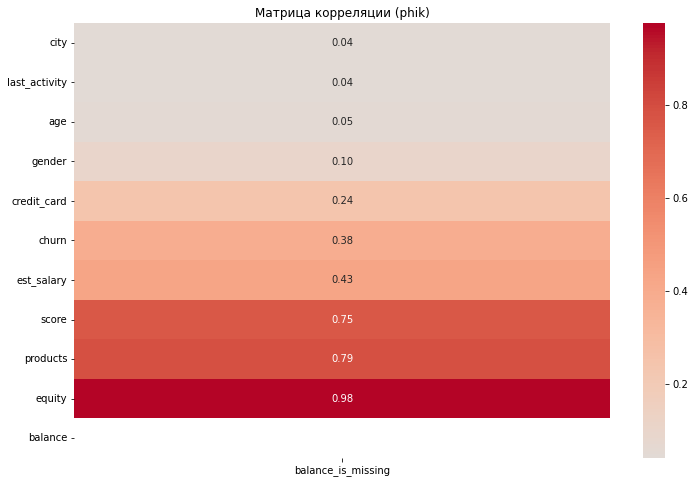

In [14]:
# рассчитаем корреляцию переменных с использованием phik
# задавая interval_cols для корректного определения непрерывных переменных
correlation_matrix = data.drop('user_id', axis=1).phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])
correlation_balance = correlation_matrix[['balance_is_missing']].drop('balance_is_missing').sort_values('balance_is_missing')

# построим тепловую карту для отображения корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_balance, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Матрица корреляции (phik)")
plt.show()

Для оценки корреляции мы будем пользоваться шкалой Чеддока: 

- `0` – полное отсутствие связи;
- `0–0.3` – очень слабая;
- `0.3–0.5` – слабая;
- `0.5–0.7` – средняя;
- `0.7–0.9` – высокая;
- `0.9–1` – очень высокая.
- `1` – абсолютная взаимозависимость.

Наблюдается очень высокая зависимость пропущенного значения от `equity`, высокая зависимость от `products` и `score`.

Таким образом, можно утверждать, что пропуски в столбце `balance` не случайны и могут быть отнесены к категории *MAR (Missing At Random)*, поскольку видим зависимость сразу от нескольких переменных. Рассчитать, каким именно значением можно заполнить пропуски по имеющимся данным без искажения результата анализа, не представляется возможным. Оставим пропуски в столбце `balance` без обработки.

In [15]:
# удалим временный столбец 
data = data.drop('balance_is_missing', axis=1)

na_percent = data.isna().mean() * 100
print('\033[1mДоля пропущенных значений после обработки:\033[0m')
display(na_percent.round(2).astype(str) + '%')

Доля пропущенных значений после обработки:


user_id            0.0%
score              0.0%
city               0.0%
gender             0.0%
age                0.0%
equity             0.0%
balance          22.85%
products           0.0%
credit_card        0.0%
last_activity      0.0%
est_salary         0.0%
churn              0.0%
dtype: object

Приведём данные к нужным типам.

In [16]:
# зададим писок столбцов для приведения к булевому типу
boolean_columns = ['churn', 'last_activity', 'credit_card']

# пройдемся по нему циклом и преобразуем тип
for column in boolean_columns:
    data[column] = data[column].astype(bool)

# зададим список столбцов для приведения к целочисленному типу
integer_columns = ['score', 'age', 'est_salary']

# пройдемся по нему циклом и преобразуем тип
for column in integer_columns:
    data[column] = data[column].astype(int)

# проверим результат
data.dtypes

user_id            int64
score              int32
city              object
gender            object
age                int32
equity             int64
balance          float64
products           int64
credit_card         bool
last_activity       bool
est_salary         int32
churn               bool
dtype: object

Для удобства масштабируем столбцы `balance` и `est_salary` до тысяч рублей.

In [17]:
# разделим столбцы на тысячу
data['balance'] = data['balance'] / 1000
data['est_salary'] = data['est_salary'] / 1000

Перейдём к исследованию **неявных дубликатов**: посмотрим, есть ли дублирующиеся значения `user_id`.

In [18]:
print('Количество дубликатов в столбце `user_id`:', data.duplicated(subset='user_id').sum())

Количество дубликатов в столбце `user_id`: 50


In [19]:
# выведем строки с дублирующимся user_id
data[data.duplicated(subset='user_id', keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362.76,3,False,True,175.92,True
7694,116540,887,Ярославль,Ж,38,0,NaN,1,False,True,119.25,False
4866,117943,855,Рыбинск,Ж,32,6,1036.83,4,True,True,107.79,True
7542,117943,880,Ярославль,Ж,40,0,NaN,1,True,False,137.72,False
5863,120258,908,Рыбинск,Ж,38,4,2213.58,2,False,True,160.33,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294.29,3,True,False,95.61,False
2597,226719,990,Ярославль,М,37,4,14648.69,2,False,False,934.41,True
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,True,False,138.58,False
8205,227795,840,Рыбинск,М,34,2,350.77,1,True,False,102.04,True


In [20]:
# проверим, есть ли строки, где одновременно дублируется id, город, пол и возраст клиента
print('Количество дубликатов по идентификатору, городу, полу и возрасту:', data.duplicated(
    subset=['user_id', 'city', 'gender', 'age']).sum())
print('Количество дубликатов по идентификатору и городу:', data.duplicated(
    subset=['user_id', 'city']).sum())

Количество дубликатов по идентификатору, городу, полу и возрасту: 0
Количество дубликатов по идентификатору и городу: 0


Есть 50 дубликатов по `user_id`, однако остальные данные клиентов в этих строках не совпадают. Так как в таблице также нет дубликатов по идентификатору и городу, можем предположить, что дублирование произошло в результате ошибки сбора данных из отделений банка в разных городах. Cтолбец `user_id` не будет использоваться в анализе, поэтому его можно удалить для удобства расчета корреляций ниже. 

In [21]:
data = data.drop('user_id', axis=1)

In [22]:
# выведем первые строки датафрейма
data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,Ж,25,1,59.21,2,False,True,75.72,True
1,861,Рыбинск,Ж,37,5,850.59,3,True,False,86.62,False
2,892,Рыбинск,Ж,30,0,NaN,1,True,True,107.68,False
3,866,Ярославль,Ж,51,5,1524.75,2,False,True,174.42,True
4,730,Ярославль,М,34,5,0.17,1,True,False,67.35,True


**Выводы**. Данные были проверены на соответствие типов, аномальные и пропущенные значения, явные и неявные дубликаты. Названия столбцов были приведены к единому регистру. В результате обработки пропуски в столбце `age` были удалены (менее 1% строк), а пропуски в столбце `balance` отнесены к типу *MAR* и оставлены без изменений. Типы данных в столбцах `credit_card`, `last_activity` и `churn` были приведены к булевым, а в столбцах `est_salary`, `age` и `score` — к целочисленному. Были обнаружены дубликаты в `user_id`: оставлены без изменений, поскольку дубли присвоены разным клиентам в результате ошибки и не повлияют на анализ. 

## Исследовательский анализ данных

### Распределение признаков

В первую очередь исследуем и визуализируем распределение признаков.

In [23]:
# зададим цветовую палитру для графиков
pastel_colors = ['#D1EDB0', '#B0D1ED', '#EDB0D1', '#C1CADA', '#DEF1ED', '#D1B0ED', '#ADD1C7', '#B0C7D1', '#C7ADD1', '#C0FFEE']

In [24]:
def create_pie_and_bar_chart(column, min_percent=5):
    """
    Функция для создания круговой и столбчатой диаграммы для категориальных и дискретных признаков.

    Параметры:
    column: Название столбца, данные из которого будут отображены на графиках.
    min_percent: Минимальный процент для отображения подписи на круговой диаграмме (по умолчанию 5%).

    """
    # группируем данные по указанному столбцу и подсчитываем количество значений
    grouped = data[column].value_counts().sort_values(ascending=False)

    # создаем подходящее количество цветов на основе заданной палитры
    colors = pastel_colors[:len(grouped)]

    # создаем фигуру для графиков
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

    # строим круговую диаграмму
    wedges, texts, autotexts = ax1.pie(grouped, labels=None, autopct='%1.1f%%', colors=colors, startangle=90)
    
    # отображаем подписи только для сегментов, где доля больше min_percent
    for i, (wedge, text, autotext) in enumerate(zip(wedges, texts, autotexts)):
        percentage = grouped.iloc[i] / grouped.sum() * 100
        if percentage > min_percent:
            text.set_text(f'{grouped.index[i]}')
        else:
            autotext.set_text('')
    
    ax1.set_title(f'Распределение {column}')

    # строим столбчатую диаграмму
    sns.barplot(x=grouped.index, y=grouped, palette=colors, ax=ax2, order=grouped.index)
    ax2.set_title(f'Распределение {column} (количество)')

    # добавляем количество значений над каждым столбиком barplot
    for i, v in enumerate(grouped):
        ax2.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

    # отображаем графики
    plt.show()

In [25]:
def plot_box(column, x_range=None):
    """
    Функция для построения горизонтального графика «ящик с усами» для заданного столбца для непрерывных переменных.

    Параметры:
    column: Название столбца.
    x_range: Диапазон значений.
    """
    # выбираем случайный цвет из списка pastel_colors
    random_color = random.choice(pastel_colors)
    
    # создаем фигуру и оси
    fig, ax = plt.subplots(figsize=(17, 4))
    
    # настраиваем горизонтальный график ящика с усами
    sns.boxplot(data=data, x=column, color=random_color, width=0.5, ax=ax)
    
    # устанавливаем диапазон значений на оси X
    ax.set_xlim(x_range)
    
    # задаем название графика и метки осей
    ax.set_title(f'Распределение {column}')
    ax.set_xlabel(f'Значения {column}')
    ax.set_ylabel(column)
    
    # отображаем график
    plt.show()

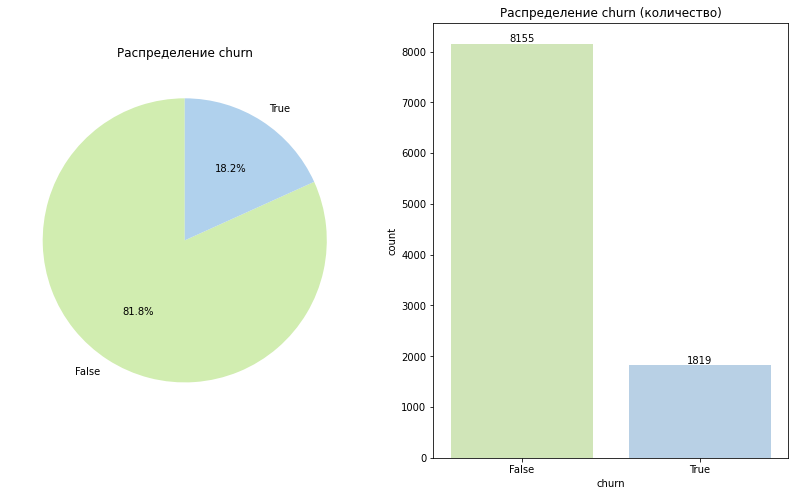

In [26]:
create_pie_and_bar_chart('churn')

**Отток клиентов составляет 18%**: ~одна пятая часть клиентов уходит из банка. 

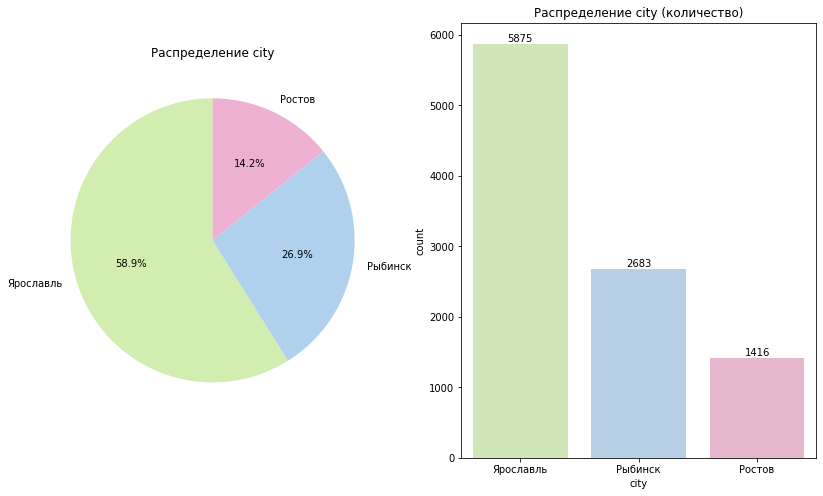

In [27]:
create_pie_and_bar_chart('city')

Количество клиентов из разных городов распределяются +-пропорционально населению. Больше всего клиентов из областного центра **Ярославля (59%)**, затем идет Рыбинск (27%, второй по величине город области) и Ростов Великий (14%). 

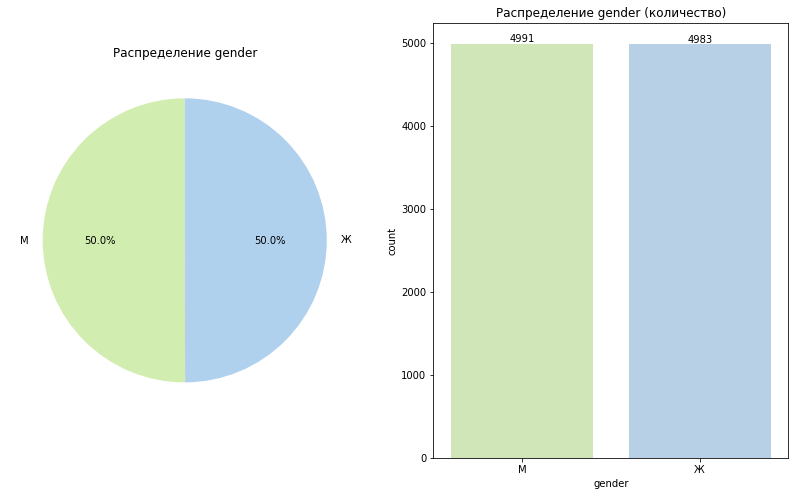

In [28]:
create_pie_and_bar_chart('gender')

**Мужчины и женщины** среди клиентов банка распределены по 50%.

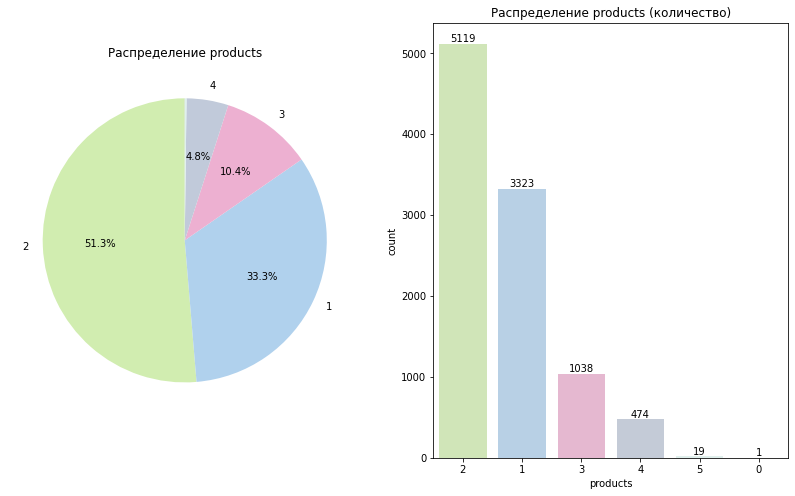

In [29]:
create_pie_and_bar_chart('products', min_percent=1)

Чаще всего клиенты банка (51%) пользуются **двумя продуктами.** Значительную долю (33%) также составляют клиенты, пользующиеся одним продуктом банка. В датафрейме всего один клиент с нулевым количеством продуктов, менее 1% данных составляют также клиенты с 5 продуктами.

In [30]:
# удалим клиента с нулевым количеством продуктов
data = data[data['products'] > 0]

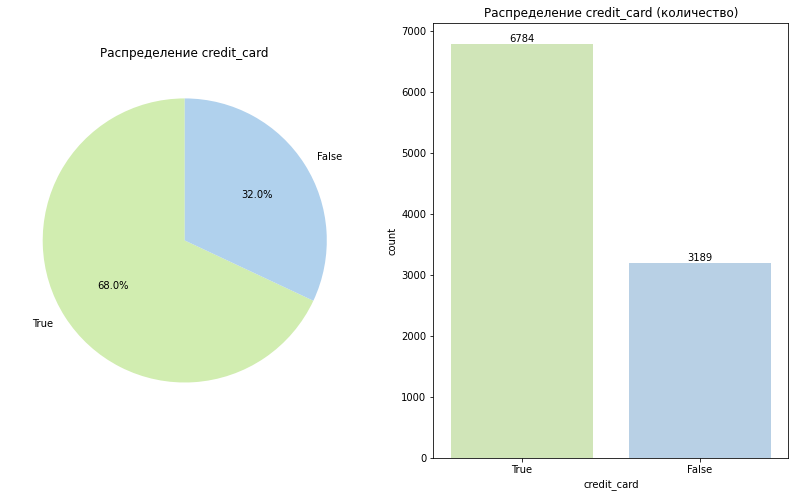

In [31]:
create_pie_and_bar_chart('credit_card')

У большей части клиентов банка **есть кредитная карта (68%)**.

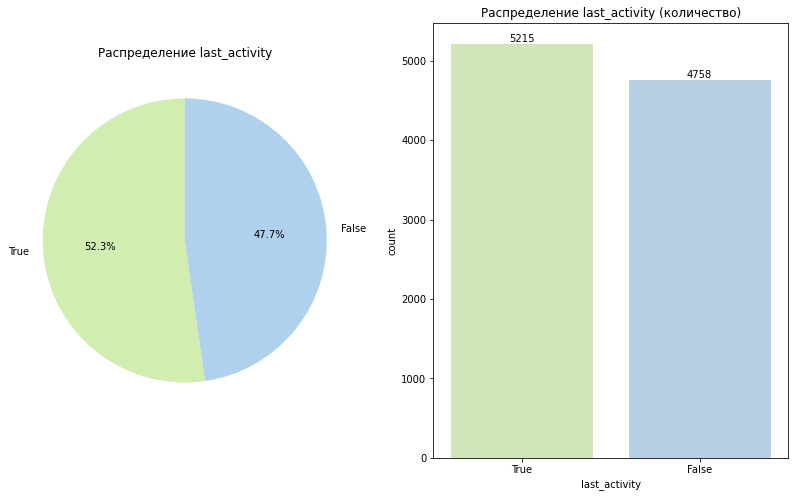

In [32]:
create_pie_and_bar_chart('last_activity')

В датасете чуть более половины **активных клиентов (52%)**. Процент неактивных клиентов достаточно большой, скорее всего так отмечены клиенты, которые бездействовали (не совершали операции) довольно непродолжительный период (например, в течение месяца). Сразу отметим, что, поскольку у нас недостаточно вводных по данному признаку, использовать его в анализе отточности и составлении сегментов затруднительно.

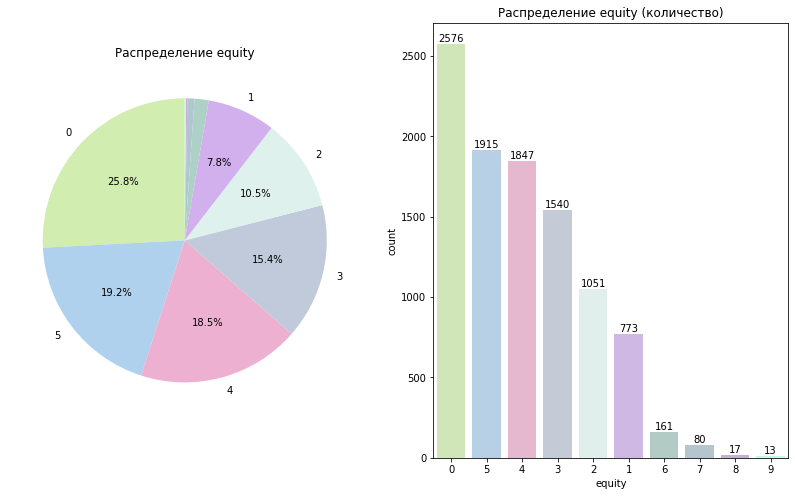

In [33]:
create_pie_and_bar_chart('equity', min_percent=2)

Четверть клиентов **не владеют собственностью (26%)**. Значительное количество клиентов с **3-5 баллами собственности (суммарно составляют половину всех клиентов)**, чуть меньше с 1-2 (суммарно одна пятая). Высокие баллы собственности 6-9 показывают ~3% клиентов.

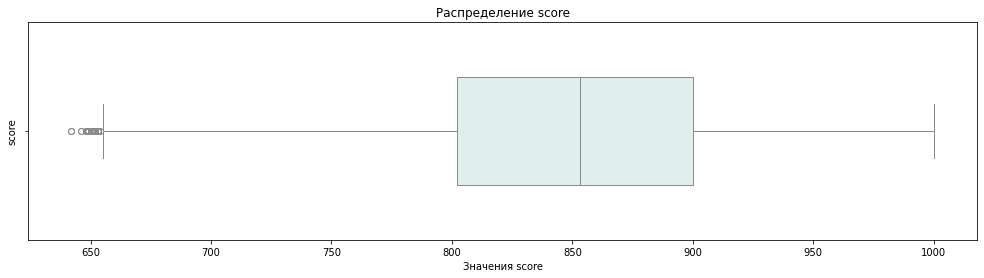

In [34]:
plot_box('score')

Межквартильный размах показывает, что больше всего клиентов обладают **кредитным скорингом 800-900 баллов**, медианное значение ~850 баллов. Нормальный размах значений 650-1000 баллов. Значения ниже предполагаемого минимума, необходимого для одобрения кредита (650 баллов), определяются как выбросы.

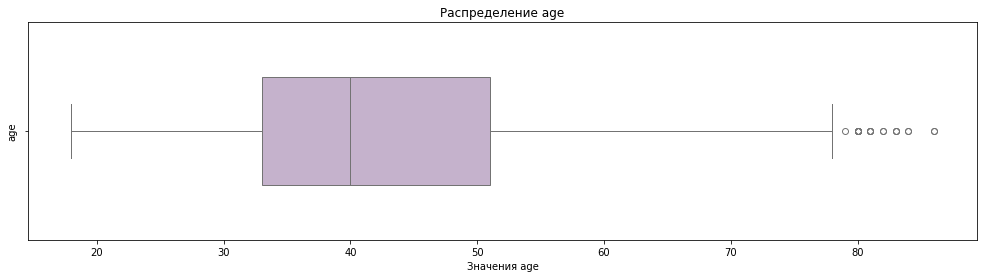

In [35]:
plot_box('age')

Больше всего клиентов в **возрастном диапазоне ~33-52 года**, нормальный размах значений ~18-77 лет, клиенты старше определяются как выбросы.

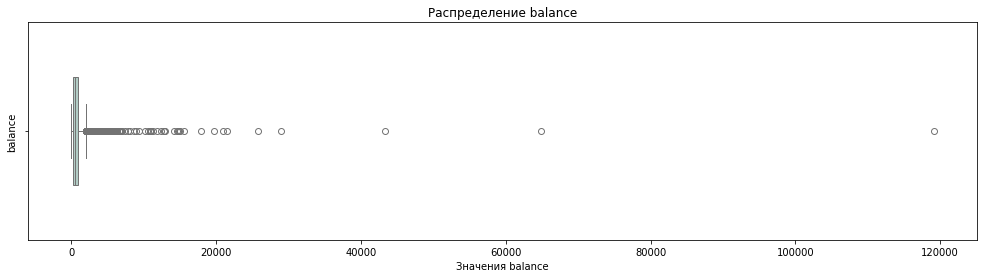

In [36]:
plot_box('balance')

Видим много выбросов в верхнем диапазоне значений **баланса**, есть клиенты с балансом ~20-119 млн рублей, при этом выбросы до ~10 млн достаточно плотно сгруппированы. 

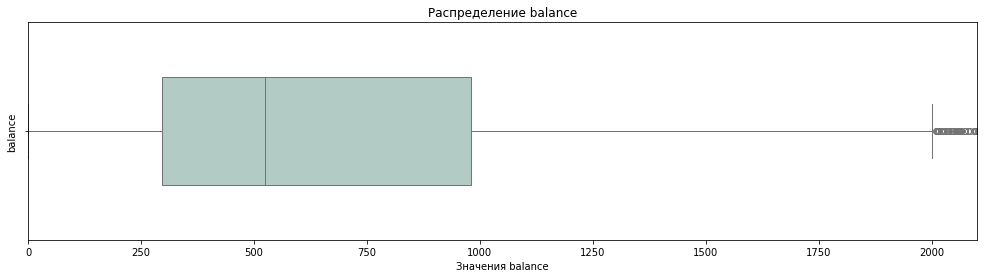

In [37]:
plot_box('balance', (0,2100))

Чаще всего **баланс клиентов ~250 тыс. — 1 млн рублей**. Нормальный диапазон значений от 0 до 2 млн. рублей. 

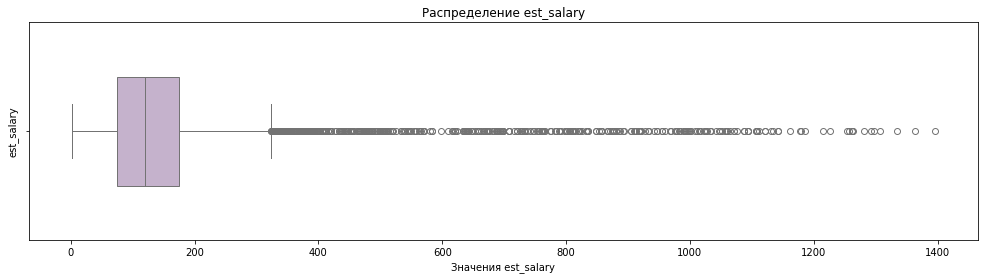

In [38]:
plot_box('est_salary')

В верхнем диапазоне значений **оценочного дохода** много выбросов, до ~1.1 млн рублей они достаточно плотно сгруппированы.

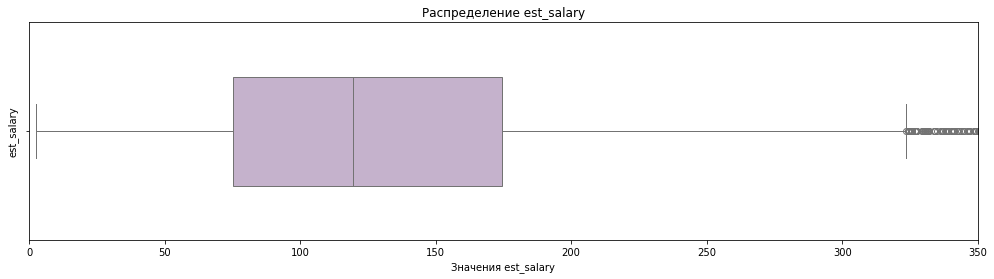

In [39]:
plot_box('est_salary', (0,350))

В среднем **доход клиентов оценивается в 75-175 тыс. рублей**. Нормальный диапазон значений от ~0-320 тыс. рублей.

**Выводы:** 

- В банке высокий уровень оттока клиентов: 18% часть клиентов уходит из банка.
- Больше всего клиентов из Ярославля — 59%. Из Рыбинска — 27%, из Ростова — 14%.
- Среди клиентов 50% мужчин и 50% женщин.
- Больше всего клиентов пользуются двумя продуктами банка — 51%. Одним продуктом — 33%, тремя — 10%, четырьмя — 5%. Менее 1% составляют клиенты с 5ью продуктами банка. 
- У 68% клиентов открыта кредитная карта банка. 
- 52% клиентов отмечены как активные.
- У половины клиентов 3-5 баллов собственности, у одной пятой 1-2 балла. 26% клиентов не владеют собственностью (значительная доля). Высокие баллы собственности 6-9 лишь у менее 3% клиентов.
- Больше всего клиентов с кредитным скорингом 800-900 баллов. Нормальный диапазон значений от нижнего порога одобрения кредита до 1000. 
- Больше всего клиентов в возрасте от 33-52 лет (взрослые, работающие и, возможно, семейные люди). Нормальный диапазон значений 18-77 лет.
- Чаще всего баланс клиентов ~250 тыс. — 1 млн рублей. Нормальный диапазон значений от 0 до 2 млн. рублей. Есть значительная доля клиентов (выбросов) с большим балансом до 119 млн.
- В среднем доход клиентов оценивается в 75-175 тыс. рублей. Нормальный диапазон значений от ~0-320 тыс. рублей. Есть значительная доля клиентов (выборосов) с высоким доходом от 330 тыс. до 1.4 млн рублей. 

### Распределение признаков в разрезе оттока

Исследуем распределение признаков в разрезе отточности. Для категориальных и дискретных переменных найдем значения, для которых уровень оттока превышает средний уровень по банку. Для непрерывных числовых переменных найдём интервал, в котором отточность превышает лояльность.

In [40]:
# создадим переменную со средним уровнем оттока по банку
average_churn_rate = data['churn'].mean()

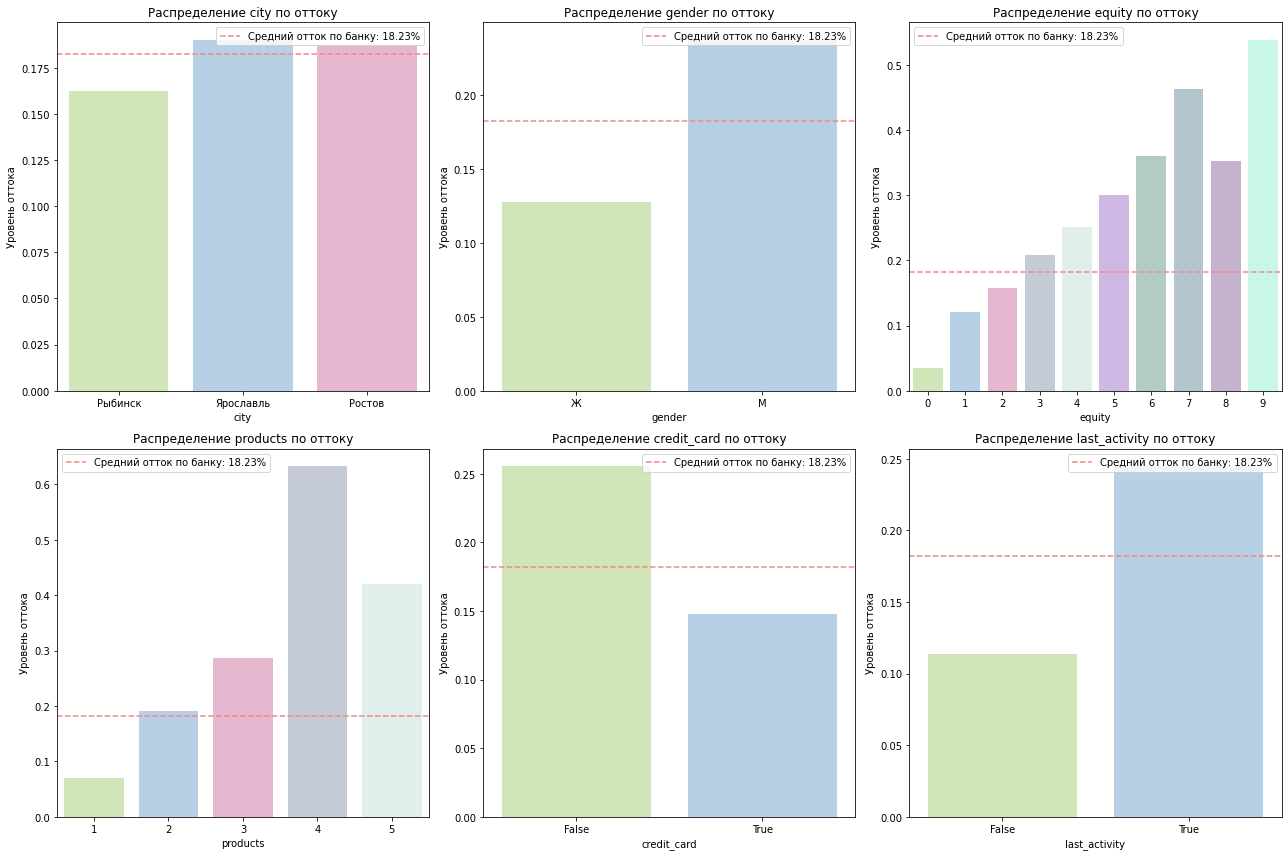

In [41]:
# создадим список столбцов для анализа
columns = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

# создадим схему размещения 3 графиков в ряд
fig, axes = plt.subplots(len(columns) // 3, 3, figsize=(18, 12))

# пройдемся циклом по созданному вышу списку и построим графики
for i, column in enumerate(columns):
    
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.barplot(data=data, x=column, y='churn', ci=None, palette=pastel_colors, ax=ax)
    
    # добавляем линию на уровне среднего оттока
    ax.axhline(average_churn_rate, color='#F48888', linestyle='--', label=f'Средний отток по банку: {average_churn_rate:.2%}')

    ax.set_title(f'Распределение {column} по оттоку')
    ax.set_xlabel(column)
    ax.set_ylabel('Уровень оттока')
    ax.legend()

plt.tight_layout()
plt.show()

- Уровень оттока в **Ярославле и Ростове** незначительно превышает средний уровень оттока по банку, уровень оттока в Рыбинске также на высоком уровне (~16%).
- Отточность среди **мужчин** превышает средний уровень отточности по банку: ~23% против ~14% среди женщин.
- Высокий уровень оттока среди клиентов с баллами собственности 6-9, однако доля таких клиентов в датасете менее 4%. Не включая в анализ этот диапазон, мы также видим, что отточность растет с баллами собственности. Отточность **клиентов с 3-5 баллами** собственности превышает среднюю отточность по банку. Наименьший уровень оттока среди клиентов с нулевым баллом собственности.
- Отточность клиентов растет с увеличением количества используемых продуктов банка. Отточность превышает среднюю по банку начиная с **2-х используемых продуктов**. Наибольший отток у клиентов с **4 продутками (61%)**.
- Отточность клиентов, у которых **нет кредитной карты**, выше среднего уровня отточности: ~25% против ~15% у клиентов с открытой кредитной картой. 
- Отточность **активных** клиентов выше средней: ~25% против ~12% среди неактивных.

In [42]:
def plot_histogram_by_churn(data, column, x_range=None, bins=None):
    """
    Построение гистограммы для непрерывного признака в разрезе оттока.

    Параметры:
    - column: Название столбца для построения гистограммы.
    - x_range: Диапазон значений для оси X (по умолчанию None).
    """
    
    # зададим контрастные пастельные цвета
    colors = ['#87CEEB', '#FF69B4']
    
    # создаем фигуру
    fig, ax = plt.subplots(figsize=(17, 7))
    
    if bins is None:
        bins = 70
    
    # настройка гистограммы с разделением по оттоку
    sns.histplot(data=data, x=column, hue='churn', palette=colors, bins=bins, common_norm=False, kde=True, stat="density", ax=ax)
    
    # настройка графика
    plt.title(f'Распределение {column} в разрезе отточности')
    plt.xlabel(column)
    plt.ylabel('Плотность')
    if x_range is not None:
        plt.xlim(x_range)  # установка диапазона значений по X
    plt.grid(True)  # отображение сетки
    
    # отображение графика
    plt.show()

In [43]:
print(np.__version__)

1.26.4


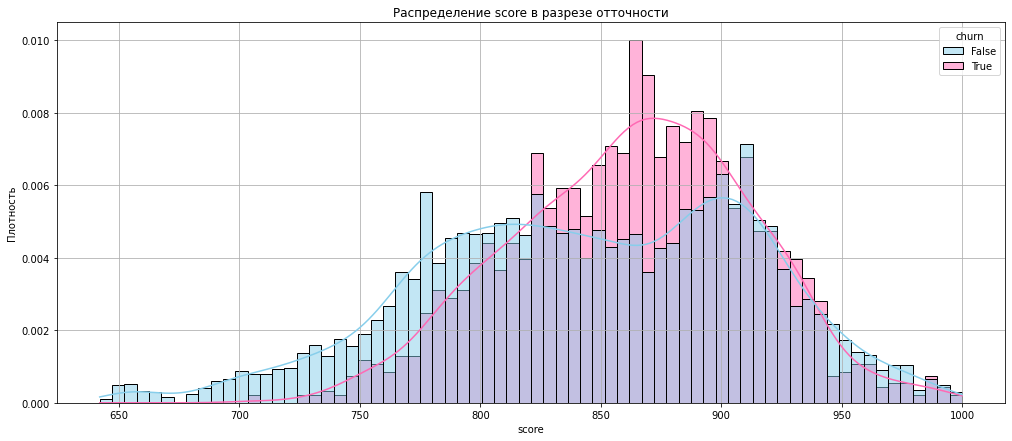

In [44]:
plot_histogram_by_churn(data, 'score')

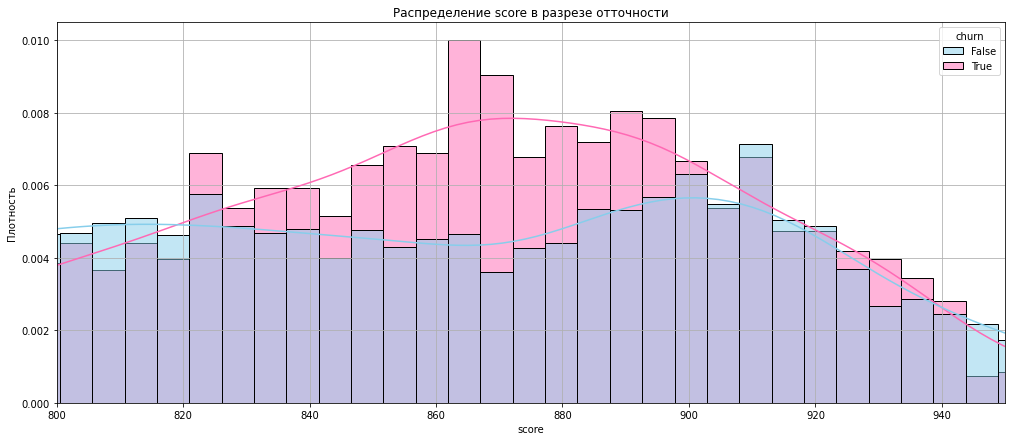

In [45]:
plot_histogram_by_churn(data, 'score', x_range=(800,950))

Отток превышает лояльность в диапазоне **~820-940 баллов кредитного скоринга**.

In [46]:
print('Уровень оттока в найденном интервале score:', (data.query('820 <= score <= 940')['churn'].mean() * 100).round(2), '%')

Уровень оттока в найденном интервале score: 22.9 %


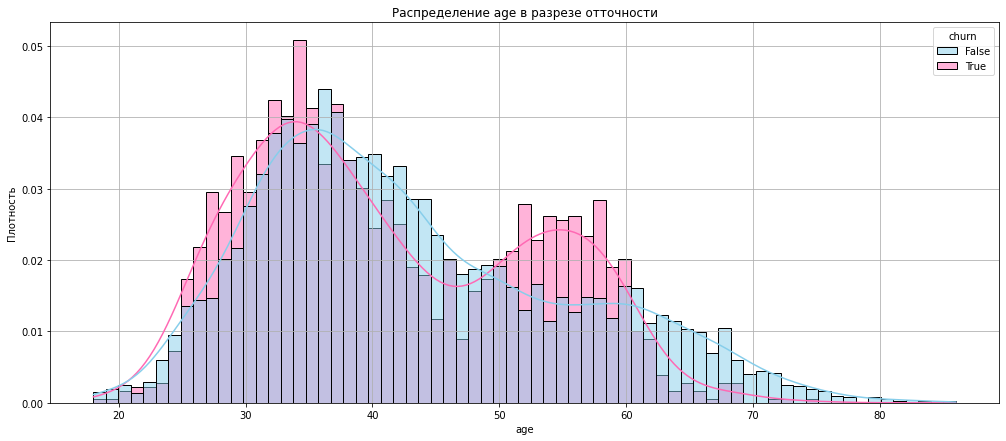

In [47]:
plot_histogram_by_churn(data, 'age', bins=69)

Отток превышает лояльность у клиентов **в возрасте 25-35 лет** и **50-60 лет**.

In [48]:
print('Уровень оттока в найденном интервале age (25-35):', 
      (data.query('25 <= age <= 35')['churn'].mean() * 100).round(2), '%')
print('Уровень оттока в найденном интервале age (50-60):', 
      (data.query('50 <= age <= 60')['churn'].mean() * 100).round(2), '%')

Уровень оттока в найденном интервале age (25-35): 21.77 %
Уровень оттока в найденном интервале age (50-60): 26.47 %


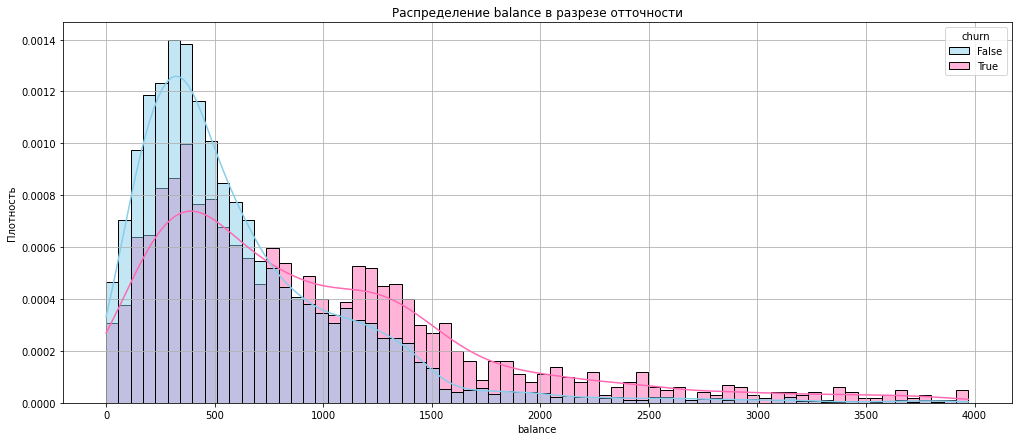

In [49]:
plot_histogram_by_churn(data.query('balance < 4000'), 'balance', x_range=None)

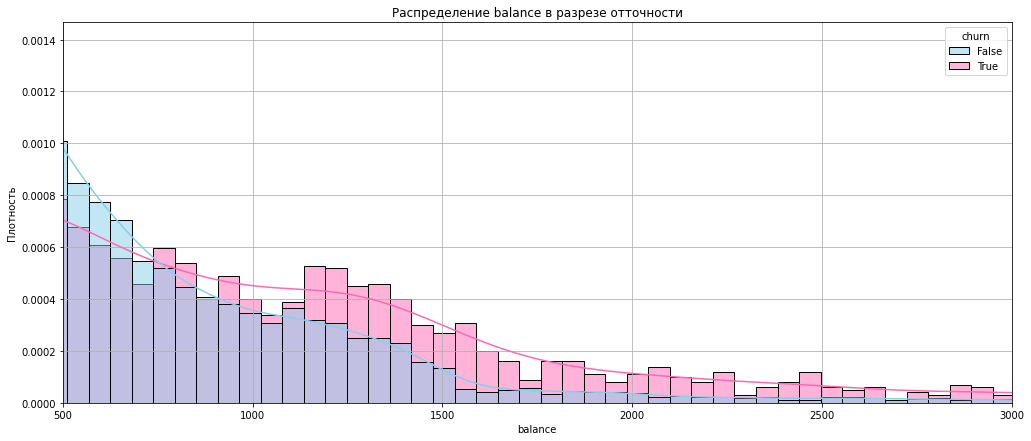

In [50]:
plot_histogram_by_churn(data.query('balance < 4000'), 'balance', x_range=(500,3000))

Клиенты с **балансом от 750 тыс. рублей** склонны к оттоку. При этом уровень оттока растет с повышением баланса, видим усиление оттока на уровне баланса **~1.2 млн рублей.**

In [51]:
print('Уровень оттока в найденном интервале balance:', 
      (data.query('balance >= 750')['churn'].mean() * 100).round(2), '%')

Уровень оттока в найденном интервале balance: 34.85 %


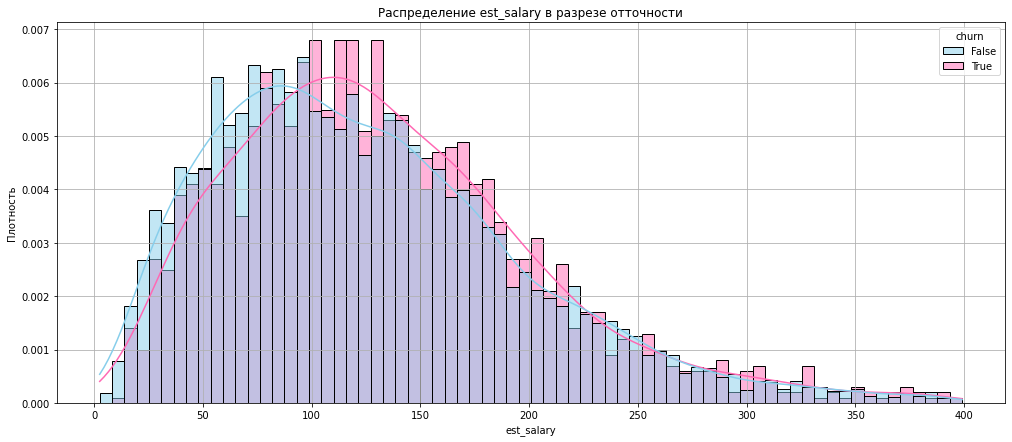

In [52]:
plot_histogram_by_churn(data.query('est_salary < 400'), 'est_salary', x_range=None)

**Клиенты с оцененным доходом 100-250 тыс. рублей** более склонны к оттоку, чем клиенты с более низким уровнем дохода.

In [53]:
print('Уровень оттока в найденном интервале est_salary:', 
      (data.query('100 <= est_salary <= 250')['churn'].mean() * 100).round(2), '%')

Уровень оттока в найденном интервале est_salary: 20.05 %


**Выводы:**
- Средний уровень отточности по банку — 18%.
- Отточность клиентов в Ярославле и Ростове находится приблизительно на уровне средней отточности по банку, слегка превышая показатель, при этом отточность в Рыбинске также высокая (16%). Город не оказывает значительного влияния на отточность. 
- Мужчины более склонны к оттоку (23%), чем женщины (14%).
- Уровень оттока растет вместе с баллами собственности. Начиная с 3 баллов, уровень оттока превышает средний по банку (28%). 
- Уровень оттока растет вместе с количеством используемых продуктов. Начиная с 2 продуктов, уровень оттока превышает средний по банку (19%).
- Клиенты без кредитной картой более склонны к оттоку (25%), чем клиенты, у которых есть кредитная карта (15%).
- Активные клиенты показывают более высокую отточность (25%), чем неактивные (12%).
- Отток превышает лояльность в диапазоне ~820-940 баллов кредитного скоринга.
- Отток превышает лояльность у клиентов в возрасте 25-35 лет и 50-60 лет.
- Клиенты с балансом от 750 тыс. рублей склонны к оттоку.
- Клиенты с оцененным доходом 100-250 тыс. рублей более склонны к оттоку, чем клиенты с более низким уровнем дохода.

### Анализ портретов клиентов в разрезе отточности

In [54]:
# разделим клиентов на отточных и не отточных
churn_group = data[data['churn'] == True]
no_churn_group = data[data['churn'] == False]

# создаем списки переменных для расчета нужных статистик
mean_columns = ['score',  'balance', 'est_salary']
median_columns = ['age', 'last_activity', 'credit_card', 'balance', 'est_salary', 'products', 'equity']
mode_columns = ['gender', 'city']

In [55]:
def group_stats(data):
    """
    Функция для создания портрета клиентов со статистиками переменных (без моды).

    Параметры:
    - data: Название датафрейма-источника.
    """
    
    result_df = pd.DataFrame(columns=['Показатель', 'Значение'])

    mean_values = []
    for column in mean_columns:
        mean = data[column].mean()
        mean_values.append({'Показатель': f'Среднее {column}', 'Значение': mean})

    median_values = []
    for column in median_columns:
        median = data[column].median()
        median_values.append({'Показатель': f'Медиана {column}', 'Значение': median})

    # Собираем весь список словарей в один DataFrame
    result_df = pd.DataFrame(mean_values + median_values)

    return result_df

In [56]:
# считаем портреты отточных и не отточных клиентов
churn_stats = group_stats(churn_group)
no_churn_stats = group_stats(no_churn_group)

# соединяем таблицы
portraits = churn_stats.merge(no_churn_stats, on='Показатель')
portraits.columns = ['Показатель', 'Отток', 'Не отток']

# считаем относительную разницу (отточные относительно неотточных)
portraits['Относительная разница (%)'] = ((portraits['Отток'] / portraits['Не отток']) - 1) * 100

# добавляем расчет моды
for column in mode_columns:
    mode_churn = churn_group[column].mode().iloc[0]
    mode_no_churn = no_churn_group[column].mode().iloc[0]
    portraits = pd.concat([portraits, pd.DataFrame({'Отток': [mode_churn], 'Не отток': [mode_no_churn]}, index=[f'Мода {column}'])])

portraits.reset_index(inplace=True)

portraits

,index,Показатель,Отток,Не отток,Относительная разница (%)
0,0,Среднее score,863.36,845.40,2.13
1,1,Среднее balance,1134.46,733.03,54.76
2,2,Среднее est_salary,148.36,147.67,0.46
3,3,Медиана age,39.00,40.00,-2.50
4,4,Медиана last_activity,1.00,0.00,inf
5,5,Медиана credit_card,1.00,1.00,0.00
6,6,Медиана balance,783.91,475.41,64.89
7,7,Медиана est_salary,125.41,118.23,6.07
8,8,Медиана products,2.00,2.00,0.00
9,9,Медиана equity,4.00,3.00,33.33


Как эталонное значение мы принимаем показатели неотточных пользователей.

- Средний показатель кредитного скоринга практически равен для обеих групп (разница 2%).
- В среднем отточные клиенты младше неотточных на 2.5%. Разница незначительная. 
- В среднем баланс отточных клиентов выше, чем баланс у неотточных на 65%.
- Средний доход различается незначительно, доход отточных клиентов выше на 6%. Разница незначительная.
- Среди отточных клиентов чаще встречаются активные клиенты, среди неотточных — неактивные.
- В обеих группах чаще всего встречаются пользователи с кредиткой.
- В среднем количество используемых продуктов не различается у двух групп. 
- Среди отточных клиентов среднее количество баллов собственности на 33% больше, чем у неотточных. 
- В среднем среди отточных клиентов чаще всего встречаются мужчины, а среди неотточных — женщины. 
- В обеих группах чаще всего встречаются клиенты из Ярославля.

**Выводы:** сильнее всего портреты клиентов в разрезе отточности различаются по `balance`, `last_activity`, `equity`, `credit_card`.

### Корреляционный анализ

Рассчитаем корреляцию между всеми переменными, используя библиотеку `phik`. В первую очередь нас будет интересовать корреляция признаков с признаком оттока `churn`.

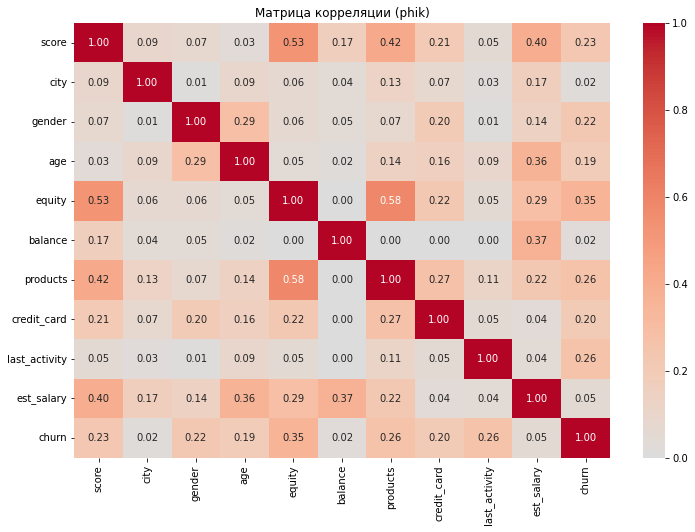

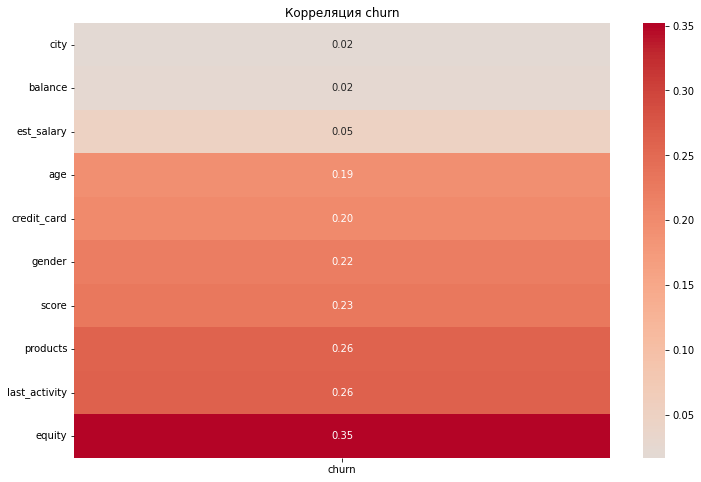

In [57]:
# рассчитаем корреляцию всех переменных с использованием phik
# задавая interval_cols для корректного определения непрерывных переменных
correlation_matrix = data.phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])

# построим тепловую карту для отображения матрицы корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Матрица корреляции (phik)")
plt.show()

# 
correlation_churn = correlation_matrix[['churn']].drop('churn').sort_values('churn')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_churn, cmap='coolwarm', center=0, annot=True, fmt=".2f")

plt.title('Корреляция churn')
plt.show()

Для оценки корреляции мы будем пользоваться шкалой Чеддока: 

- `0` – полное отсутствие связи;
- `0–0.3` – очень слабая;
- `0.3–0.5` – слабая;
- `0.5–0.7` – средняя;
- `0.7–0.9` – высокая;
- `0.9–1` – очень высокая.
- `1` – абсолютная взаимозависимость.

**Выводы:** 
- По шкале Чеддока между оттоком и остальными признаками **очень слабая корреляция**, кроме переменной собственности `equity`, с которой у оттока **слабая корреляция**.
- Между `est_salary`, `city`, `balance` и оттоком — наименьшая корреляция (0.02-0.05).
- Выше корреляция оттока с `age`, `credit_card`, `gender`, `score` (0.18-0.23).
- Корреляция оттока с `products`, `last_activity` — 0.26. 
- Выше мы уже оценивали распределение признаков в разрезе отточности, превышение среднего уровня оттока по банку было наиболее значительным у клиентов с высокими баллами собственности от 3. Здесь видим также, что самый высокий коэффициент корреляции у оттока и `equity` — 0.35, свидетельствующий в данном случае о наличии слабой положительной корреляции.
- Наиболее значительная (в данном случае средняя) зависимость закономерно наблюдается между `score` и `equity`, а также между `equity` и `products`.

## Проверка статистических гипотез

### Гипотеза о равенстве доходов

**H0:** доходы `est_salary` клиентов, которые ушли `churn = True`, и клиентов, которые остались `churn = False`, равны.  
**H1:** доходы `est_salary` клиентов, которые ушли `churn = True`, и клиентов, которые остались `churn = False`, не равны.  

В первую очередь определим, можем ли мы использовать t-тест Стьюдента. Применим тест Шапиро-Уилка для оценки распределения.

In [58]:
# выбираем отточных и неотточных клиентов
salary_churn = data[data['churn'] == True]['est_salary']
salary_no_churn = data[data['churn'] == False]['est_salary']

In [59]:
# задаем уровень значимости
alpha = 0.05

def check_distr(data):
    """
    Функция для проверки нормальности распределения.
    
    Параметры:
        - data: Отфильтрованные данные для выделенной группы.
    """

    # проводим тест Шапиро-Уилка
    stat, p_value = st.shapiro(data)

    # проверяем гипотезу о нормальности
    if p_value > alpha:
        print("Распределение похоже на нормальное")
    else:
        print("Распределение не является нормальным")

In [60]:
check_distr(salary_churn)

Распределение не является нормальным


In [61]:
check_distr(salary_no_churn)

Распределение не является нормальным


Поскольку распределение не является нормальным, следовательно, мы не можем использовать t-тест. Для проверки гипотезы используем непараметрический **тест Манна-Уитни**: он не требует предположения о нормальности распределения.

In [62]:
# проводим тест Манна-Уитни
stat, p_value = st.mannwhitneyu(salary_churn, salary_no_churn)

# вывод результатов
print("Статистика теста:", stat)
print("p-значение:", p_value)

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: доходы различаются")
else:
    print("Не отклоняем нулевую гипотезу: доходы равны")

Статистика теста: 7830542.5
p-значение: 0.00016834064593786413
Отклоняем нулевую гипотезу: доходы различаются


Таким образом, в результате проверки первой гипотезы о равенстве доходов мы можем утверждать, что между отточными и неотточными клиентами есть статистически значимое различие в доходе, причем p-значение сильно меньше уровня значимости.

### Гипотеза о равенстве возрастов

**H0:** возраст `age` клиентов, которые ушли `churn = True`, и клиентов, которые остались `churn = False`, равны.  
**H1:** возраст `age` клиентов, которые ушли `churn = True`, и клиентов, которые остались `churn = False`, не равны.  

In [63]:
# создаем выборки дохода для клиентов, которые ушли и остались
age_churn = data[data['churn'] == True]['age']
age_no_churn = data[data['churn'] == False]['age']

Проверим распределение.

In [64]:
check_distr(age_churn)

Распределение не является нормальным


In [65]:
check_distr(age_no_churn)

Распределение не является нормальным


Поскольку распределение не является нормальным, будем использовать тест Манна-Уитни.

In [66]:
# проводим тест Манна-Уитни
stat, p_value = st.mannwhitneyu(age_churn, age_no_churn)

# вывод результатов
print("Статистика теста:", stat)
print("p-значение:", p_value)

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: возраст различается")
else:
    print("Не отклоняем нулевую гипотезу: возраст равен")

Статистика теста: 6900079.0
p-значение: 3.811912767980522e-06
Отклоняем нулевую гипотезу: возраст различается


Можем говорить о наличии статистически значимого различия в возрасте между отточными и неотточными клиентами. 

### Гипотеза о равенстве балансов

**H0:** балансы `balance` клиентов, которые ушли `churn = True`, и клиентов, которые остались `churn = False`, равны.  
**H1:** балансы `balance` клиентов, которые ушли `churn = True`, и клиентов, которые остались `churn = False`, не равны.

In [67]:
# создаем выборки дохода для клиентов, которые ушли и остались
balance_churn = data[data['churn'] == True]['balance'].dropna()
balance_no_churn = data[data['churn'] == False]['balance'].dropna()

Проверим распределение.

In [68]:
check_distr(balance_churn)

Распределение не является нормальным


In [69]:
check_distr(balance_no_churn)

Распределение не является нормальным


Поскольку распределение не является нормальным, будем использовать тест Манна-Уитни.

In [70]:
# проводим тест Манна-Уитни
stat, p_value = st.mannwhitneyu(balance_churn, balance_no_churn)

# вывод результатов
print("Статистика теста:", stat)
print("p-значение:", p_value)

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: баланс различается")
else:
    print("Не отклоняем нулевую гипотезу: баланс равен")

Статистика теста: 6784398.0
p-значение: 1.4891162831993246e-70
Отклоняем нулевую гипотезу: баланс различается


Можем говорить о наличии статистически значимого различия в балансе между отточными и неотточными клиентами.

## Определение критериев отточности

Был определен высокий отток клиентов: **доля ушедших клиентов составляет 18.2% (1 819)**, доля оставшихся клиентов — 81.8% (8 155). Одна пятая часть клиентов уходит из банка.

**Портрет клиента банка:**
- Из Ярославля (59%);
- Пользуется двумя продуктами банка (51%);
- Есть кредитная карта (68%);
- Владеет 3-5 баллами собственности (55%);
- Обладает высоким кредитным скорингом 850 баллов;
- Возраста 33-52 года;
- Имеет 250 тыс.-1 млн рублей на счёте;
- Зарабатывает 75-175 тыс. рублей.

Выделим критерии, которые войдут в основу сегментации пользователей, суммируя результаты исследовательского анализа и проверки гипотез. 

### Город

`city`: Больше всего клиентов из Ярославля — 59%. Из Рыбинска — 27%, из Ростова — 14%.
- уровень оттока приблизительно на уровне среднего, в Рыбинске отток незначительно ниже (16%); **(-)**
- портреты клиентов не различаются по данному признаку, в обеих группах чаще всего встречаются клиенты из Ярославля; **(-)**
- низкий коэффициент корреляции с оттоком (0.02), свидетельстующий практически о полном отсутствии связи. **(-)**


**Критерий `city` не подходит для сегментации отточных пользователей.**

### Пол клиентов

`gender`: Среди клиентов 50% мужчин и 50% женщин. 

- уровень оттока мужчин превышает средний (23%); **(+)**
- портреты отточных и неотточных клиентов различаются: среди ушедших клиентов чаще встречаются мужчины; **(+)**
- между полом и оттоком установлено наличие корреляции с коэффициентом 0.22. **(+)**

**Критерий `gender` можно рассмотреть для сегментации отточных пользователей.**

### Количество используемых продуктов

`products`: Половина клиентов — 51% — пользуются двумя продуктами банка, 33% — одним продуктом, 10% — тремя, 5% — четырьмя, менее 1% — пятью. Отточность клиентов растет с увеличением количества используемых продуктов банка.

- отточность клиентов с 3-4 продуктами (27%, 61%) превышает среднюю отточность по банку; **(+)**
- портреты клиентов не различаются по данному признаку: медиана 2; **(-)**
- между количеством продуктов и оттоком установлена корреляция с коэффициентом 0.26. **(+)**

**Критерий `products` можно рассмотреть для сегментации отточных пользователей во вторую очередь**.

### Наличие кредитной карты

`credit_card`. У 68% клиентов открыта кредитная карта банка.

- уровень оттока пользователей без кредитной карты превышает средний по банку (25%); **(+)**
- среди отточных на 22% меньше клиентов, оформивших кредитную карту; **(+)**
- установлена связь с оттоком с коэффициентом 0.2. **(+)**

**Критерий `credit_card` можно рассмотреть для сегментации отточных пользователей**.

### Последняя активность пользователей

`last_activity`: 52% клиентов отмечены как активные.

- отточность активных клиентов выше среднего уровня по банку (25%); **(+)**
- среди отточных на 45% больше активных, чем среди оставшихся клиентов; **(+)**
- установлена корреляция с оттоком с коэффициентом 0.26. **(+)**

Однако у нас недостаточно вводных об этом признаке: за активность могут приниматься совершенные действия/транзакции в выделенный период (например, месяц). Возможно, перед уходом из банка, клиенты переводят средства на счет в другой банк. По данному признаку сложно судить об отточности и возможных рекомендациях. **Критерий `last_activity` не подходит для сегментации отточных пользователей.**

### Баллы собственности

`equity`: ~50% клиентов — 3-5 баллов собственности, ~20% клиентов — 1-2 балла, 26% клиентов — 0 баллов, менее 3% — 6-9 баллов. Уровень оттока растет с ростом баллов собственности. 

- отточность клиентов с 3-5 баллами собственности превышает средний уровень по банку (21%, 25%, 30%); **(+)**
- относительная разница между группами 33%; **(+)**
- у баллов собственности и оттока самая сильная связь относительно прочих параметров с корреляцией 0.35. **(++)**

**Критерий `equity` можно рассмотреть для сегментации отточных пользователей в первую очередь.**

### Кредитный скоринг

`score`: Больше всего клиентов с кредитным скорингом 800-900 баллов.

- выявлен интервал, в котором отточность превышает лояльность (820-940, отток 23%); **(+)**
- разница между группами практически отсутствует (2%); **(-)**
- установлена корреляция с оттоком с коэффициентом 0.23. **(+)**

**Критерий `score` можно рассмотреть для сегментации отточных пользователей во вторую очередь.**

### Возраст клиентов

`age`: Больше всего клиентов в диапазоне 33-52 лет. 

Отток превышает лояльность у клиентов в двух интервалах: **в возрасте 25-35 лет и 50-60 лет**. В среднем отточные клиенты незначительно младше неотточных (относительная разница 2.5%). 
Коэффициент корреляции 0.18 говорит о наличии очень слабой связи между оттоком и возрастом. Проверка гипотезы о равенстве доходов тем не менее показала, что между отточными и неотточными клиентами есть статистически значимое различие в возрасте. 

- выявлено два отточных интервала (25-35 с оттоком 22%, 50-60 с оттоком 26%); **(+)**
- разница между отточной и неотточной группами минимальная (в пределах 4%); **(-)**
- установлена корреляция с оттоком с коэффициентом 0.18. **(+-)**
- проверка гипотезы показала, что есть статистически значимое различие между группами **(+)**.

**Критерий `age` можно рассмотреть для сегментации отточных пользователей во вторую очередь**.

### Баланс на счете

`balance`: Чаще всего баланс клиентов составляет ~ 250 тыс. — 1 млн рублей. 

- выделен рубеж, на котором отточность начинает превышать лояльность: от 750 тыс. рублей с уровнем оттока 34.85 %, от 1.2 млн усиление отточности; **(+)**
- между группами есть разница по данному признаку (65%); **(+)**
- корреляционный анализ показал почти полное отсутствие связи с оттоком (коэффициент 0.02); **(-)**
- однако проверка гипотез показала, что между группами есть статистически значимое различие. **(+)**

**Критерий `balance` можно рассмотреть для сегментации отточных пользователей**.

### Оценочный доход

`est_salary`: В среднем доход клиентов оценивается в 75-175 тыс. рублей. 

- выделен отточный интервал: 100-250 тыс. рублей с уровнем оттока 20.05 %; **(+-)**
- группы незначительно различаются по данному признаку (отн. разница 6%); **(+-)**
- между доходом и оттоком практически отсутствует корреляция с коэффициентом 0.05; **(-)**
- однако проверка гипотез показала, что между группами есть статистически значимое различие в доходах. **(+)**

**Критерий `est_salary` можно рассмотреть для сегментации отточных пользователей во вторую очередь.**

### Выводы

На основании уровня отточности в выделенном значении/интервале, относительной разницы между портретами и наличия корреляции в сегментации мы в первую очередь будем использовать следующие критерии: `equity`, `credit_card`, `gender`, `balance`. Во вторую очередь: `products`, `score`, `age`, `est_salary`.

## Сегментация клиентов с рекомендациями по выделенным сегментам

Выделим сегменты от 500 клиентов, в которых отточность превышает средний уровень оттока по банку 18.2%. Для сегментации наибольший вес имели следующие отточные критерии:

- количество баллов собственности от 3 включительно `equity >= 3`;
- отсутствие кредитной карты `credit_card == False`;
- мужской пол `gender == M`;
- баланс на счете от 750 тыс. рублей `balance >= 750`, для высокодоходных от 1.2 млн;

Также рассмотрены дополнительные критерии:
- количество используемых продуктов от 3 включительно `products >= 3`;
- кредитный скоринг 820-940 баллов `820 <= score <= 940`;
- возраст 25-35 лет и 50-60 лет `25 <= age <= 35` и `50 <= age <= 60`;
- оценочный доход 100-250 тыс. рублей `est_salary <= 100`.

Поскольку ресурсы отдела маркетинга ограничены, после перебора признаков мы оставим только высокооточные сегменты с уровнем оттока от 45%.

In [71]:
def churn_size_group(group):
    """
    Функция для расчета размера группы, количества отточных клиентов и уровня оттока.
    
    Параметры: 
        group: Отфильтрованный датафрейм для группы.
    """
    # считаем размер группы и количество отточных клиентов
    group_size = len(group)
    churn_count = group['churn'].sum()
    # рассчитываем уровень оттока
    churn_rate = group['churn'].mean() * 100  # в процентах
    
    print("Общее количество клиентов в группе:", group_size)
    print("Количество отточных клиентов в группе:", churn_count)
    print("Уровень оттока в группе:", churn_rate.round(2), "%")

Ниже представлены сегменты, найденные в результате комбинирования признаков оттока.

### Состоятельные клиенты

Клиенты от 3-х баллов собственности `equity`, с балансом от 1.2 млн рублей `balance` и доходом от 100 тыс. рублей `est_salary`. 

In [72]:
group_1 = data.query('equity >= 3 & balance > 1200 & est_salary >= 100')
churn_size_group(group_1)

Общее количество клиентов в группе: 994
Количество отточных клиентов в группе: 471
Уровень оттока в группе: 47.38 %


Таким клиентам можно предложить: 
1) повышенный процент по долгосрочным вкладам (тариф *PRIME*);  
2) повышенный кэшбэк на категории товаров, в которых клиенты тратят более 30 тыс. рублей в месяц;  
3) повышенный кэшбэк на дорогостоящие категории товаров: бытовая техника, электроника, авиабилеты и бронирование отелей.

### Мужчины, владеющие собственностью

Клиенты мужского пола, от 3-х баллов собственности и балансом от 750 тыс. рублей. Дополнительный признак, который поможет сформировать персонализированное предложение и повысить отточность сегмента — отсутствие кредитной карты.

In [73]:
group_2 = data.query('equity >= 3 & gender == "М" & balance > 750 & credit_card == False')
churn_size_group(group_2)

Общее количество клиентов в группе: 537
Количество отточных клиентов в группе: 309
Уровень оттока в группе: 57.54 %


Таким клиентам можно предложить:
1) оформить кредитную с повышенным кэшбэком на услуги по обслуживанию автомобиля (автосервисы, СТО, заправки, страхование и пр.);  
2) повышенный процент по вкладам до востребования;  
3) пониженный процент по ипотеке под залог имущества.

### Молодые надёжные заемщики

Клиенты 25-35 лет `age`, с высоким баллом кредитного скоринга `score`, без кредитной карты `credit_card`.

In [74]:
group_3 = data.query('820 <= score <= 940 & credit_card == False & 25 <= age <= 35')
churn_size_group(group_3)

Общее количество клиентов в группе: 569
Количество отточных клиентов в группе: 262
Уровень оттока в группе: 46.05 %


Таким клиентам можно предложить:

1) пониженный процент по ипотеке на расширение семьи;  
2) оформить кредитную карту с бесплатным обслуживанием и повышенным кэшбэком на развлечения и рестораны.

### Приоритизация сегментов

Приоритизируем сегменты по количеству отточных клиентов.

1) Поскольку мы обнаружили тенденцию к оттоку по всем признакам, свидетельствующим о состоятельности клиентов (высокий доход, баланс, баллы собственности), **в первую очередь рекомендуется обратить внимание на первый сегмент «Состоятельные клиенты»**. Это группа клиентов с высокой отточностью 46% с оптимальным размером около 1000 клиентов, поэтому действия, направленные на эту группу должны быть эффективны в снижении общего уровня оттока по банку. Количество отточных клиентов в группе: 471.

2) Следующий по приоритету сегмент — **«Мужчины, владеющие собственностью»**. В этом сегменте 537 клиентов, а уровень оттока достигает 58% — самый высокий показатель из трех сегментов. Количество отточных клиентов в группе: 309.

3) Третий приоритет у сегмента **«Молодые надёжные заемщики»**. Размер сегмента — 569 клиентов, уровень оттока — 46%. Количество отточных клиентов в группе: 262.